In [13]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

In [14]:
# Шаг 1: Загрузка предобученной модели
model = MobileNetV2(weights='imagenet')  # Загружаем модель с весами ImageNet

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Функция для загрузки и подготовки изображений
def load_and_preprocess_images(image_paths):
    images = []
    for img_path in image_paths:
        # Загрузка изображения и изменение размера
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)  # Преобразуем в массив NumPy
        img_array = preprocess_input(img_array)  # Предобработка
        images.append(img_array)
    return np.array(images)

In [22]:
def display_predictions(image_paths, predictions):
    for img_path, prediction in zip(image_paths, predictions):
        # Отображение изображения
        img = image.load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Результаты классификации")
        plt.show()

        # Проверяем размерность предсказаний
        if len(prediction.shape) == 1:  # Если одномерный массив
            prediction = np.expand_dims(prediction, axis=0)  # Преобразуем в 2D-формат

        # Топ-3 предсказания
        decoded_predictions = decode_predictions(prediction, top=3)
        print(f"Предсказания для {os.path.basename(img_path)}:")
        for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
            print(f"  {i+1}: {label} ({score:.2f})")
        print()

In [44]:
# Шаг 2: Указание путей к изображениям
image_paths = [
    'lion.jpg',
    'wolf.jpg',
    'Слон.jpg',
    'shark.jpg',
    'филин.jpg',
    'watermelon.jpg'
]

In [45]:
# Шаг 3: Загрузка и предобработка изображений
images = load_and_preprocess_images(image_paths)

In [46]:
# Шаг 4: Прогнозирование классов
predictions = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


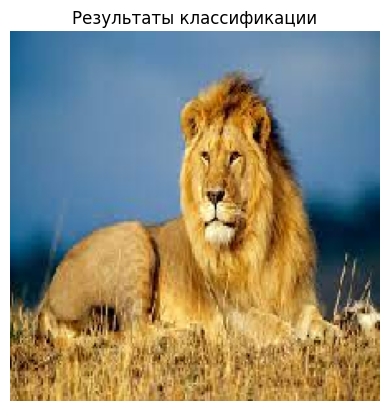

Предсказания для lion.jpg:
  1: lion (0.90)
  2: cheetah (0.01)
  3: chow (0.00)



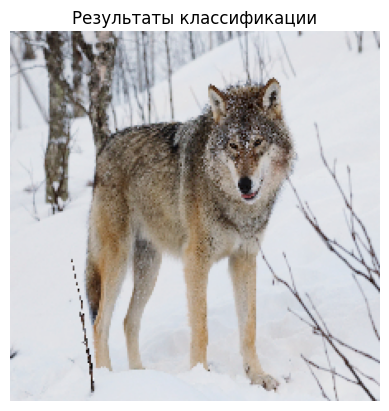

Предсказания для wolf.jpg:
  1: coyote (0.53)
  2: timber_wolf (0.28)
  3: red_wolf (0.07)



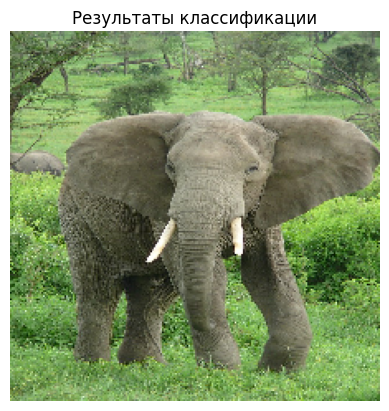

Предсказания для Слон.jpg:
  1: African_elephant (0.63)
  2: tusker (0.10)
  3: Indian_elephant (0.06)



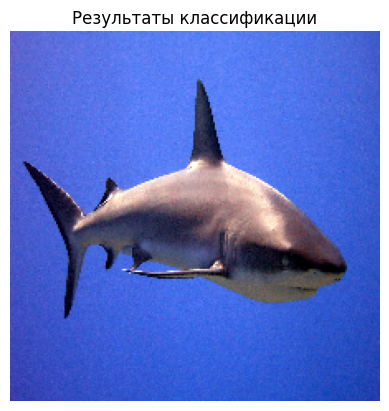

Предсказания для shark.jpg:
  1: great_white_shark (0.52)
  2: hammerhead (0.20)
  3: tiger_shark (0.06)



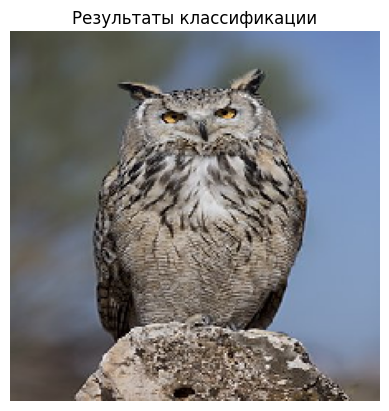

Предсказания для филин.jpg:
  1: great_grey_owl (0.27)
  2: lynx (0.12)
  3: ruffed_grouse (0.10)



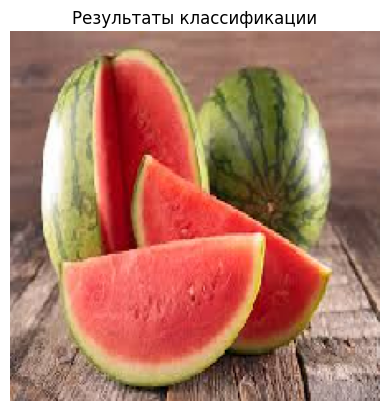

Предсказания для watermelon.jpg:
  1: cucumber (0.38)
  2: butternut_squash (0.07)
  3: bell_pepper (0.05)



In [47]:
# Шаг 5: Отображение результатов
display_predictions(image_paths, predictions)